<span style='color:Red'> **Assignment 1: Introduction to Machine Learning** </span>

**RMIT University Vietnam**

**Course:** COSC2753

**Name:** Pham Cong Minh

**ID:** s3818102

**Lecturer:** Dr. Duy Dang Pham Thien

**Submission Due Date:** 16 April 2021

# Import libraries and Read train dataset

In [1]:
# Import essential libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 

# Import data preparation module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

# Import model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from matplotlib import style
style.use('dark_background')

In [4]:
# Read train dataset
train_df = pd.read_csv("train_data.csv")
train_df = train_df.drop(['ID','HealthServiceArea'], axis = 1)
train_df.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


# Data Exploration

## Columns and Datatypes

In [5]:
# Show datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

In [4]:
# Missing value
def missing_value_of_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage], axis=1, keys=['Total','Percentage'])

In [5]:
missing_value_of_data(train_df)

,Total,Percentage
ID,0,0.0
HealthServiceArea,0,0.0
Gender,0,0.0
Race,0,0.0
TypeOfAdmission,0,0.0
CCSProcedureCode,0,0.0
APRSeverityOfIllnessCode,0,0.0
PaymentTypology,0,0.0
BirthWeight,0,0.0
EmergencyDepartmentIndicator,0,0.0


In [6]:
# Describe statistical value
train_df.describe()

,ID,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,29983.500000,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,17310.837458,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,1.000000,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,14992.250000,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,29983.500000,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,44974.750000,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,59966.000000,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [6]:
# Transform LengthOfStay into binary class (0 for <4 and 1 for >= 4 days)
train_df['LengthOfStay'] = train_df['LengthOfStay'].apply(lambda x: 0 if int(x) < 4 else 1)
train_df['LengthOfStay'].value_counts()


0    49895
1    10071
Name: LengthOfStay, dtype: int64

In [7]:
# Data inspecting
for col in train_df.columns:
    print(train_df[col].value_counts())
    print('---------------------------')

M    30978
F    28987
U        1
Name: Gender, dtype: int64
---------------------------
White                     32943
Other Race                18314
Black/African American     8183
Multi-racial                526
Name: Race, dtype: int64
---------------------------
Newborn      58741
Emergency      659
Urgent         412
Elective       154
Name: TypeOfAdmission, dtype: int64
---------------------------
 228    19886
 115    13628
 0      11189
 220    10773
 231     2981
-1        769
 216      740
Name: CCSProcedureCode, dtype: int64
---------------------------
1    47953
2     8760
3     3252
4        1
Name: APRSeverityOfIllnessCode, dtype: int64
---------------------------
Medicaid                     28723
Private Health Insurance     15608
Blue Cross/Blue Shield       12073
Self-Pay                      1984
Federal/State/Local/VA         849
Managed Care, Unspecified      545
Miscellaneous/Other            118
Medicare                        44
Unknown                        

The "TypeOfAdmission" column didn't record any "Trauma" and "Not available" type

The "PaymentTypology" column didn't record

## Create feature and target dataframe

In [ ]:
X = train_df.drop('LengthOfStay', axis = 1)
Y = train_df['LengthOfStay'].apply(lambda x: 0 if int(x) <= 3 else 1)

### Visualize data

C:\Users\luong\anaconda3\envs\Basic Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LengthOfStay', ylabel='count'>

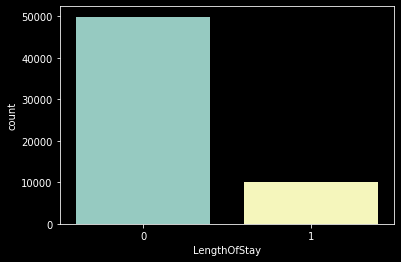

In [12]:
# LoS percentage
sns.countplot(train_df['LengthOfStay'])

In [13]:
def Facet_Grid_sns(df):
    for c in df.columns:
        g = sns.FacetGrid(df, col='LengthOfStay',height =4, aspect = 2)
        g.map(plt.hist, str(c) ,bins=20)
        g.set_axis_labels(c, "Count")

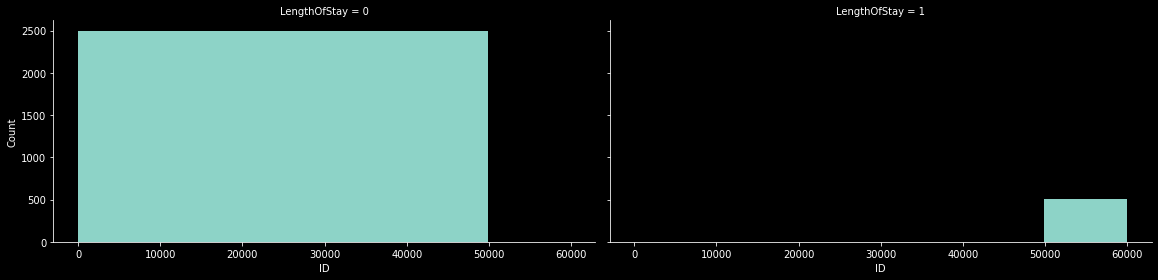

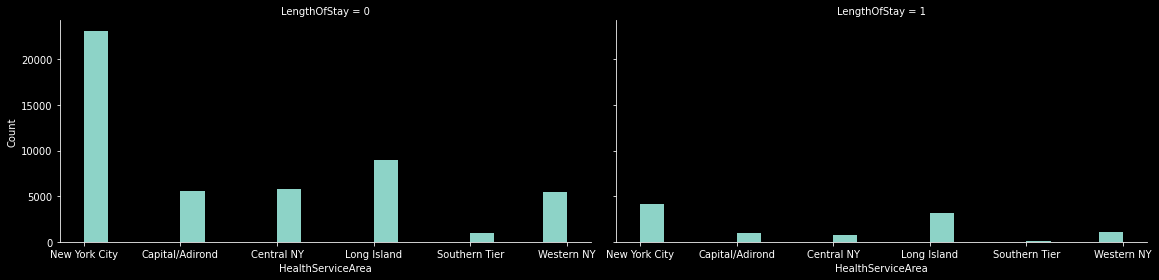

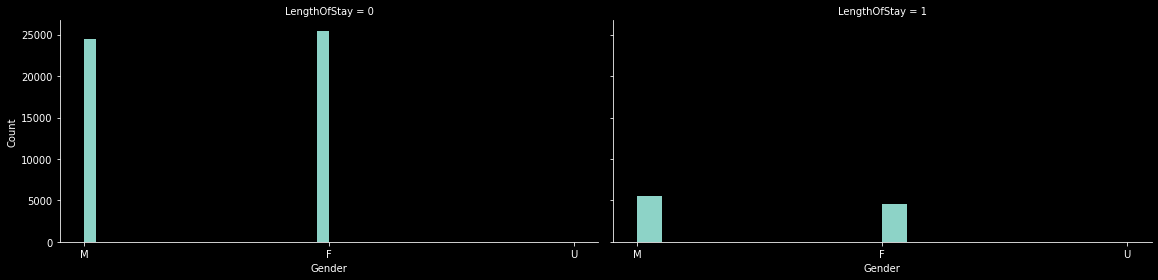

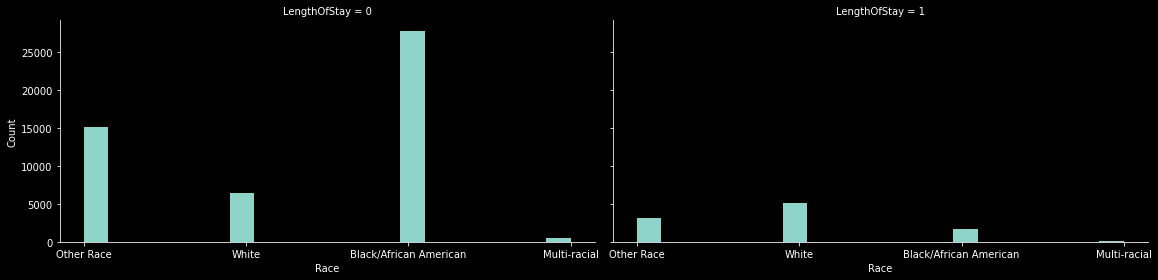

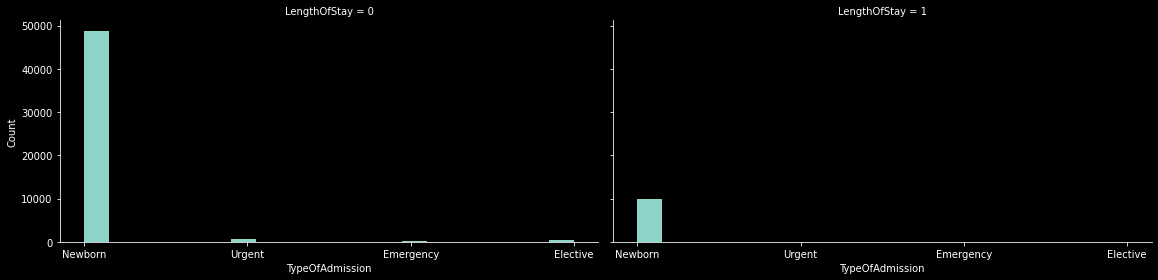

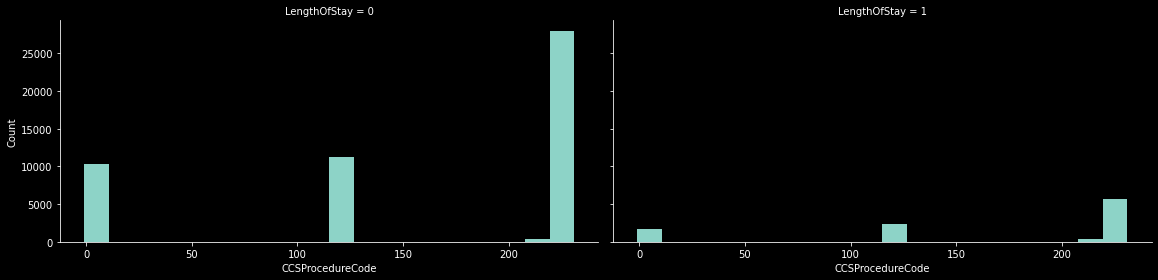

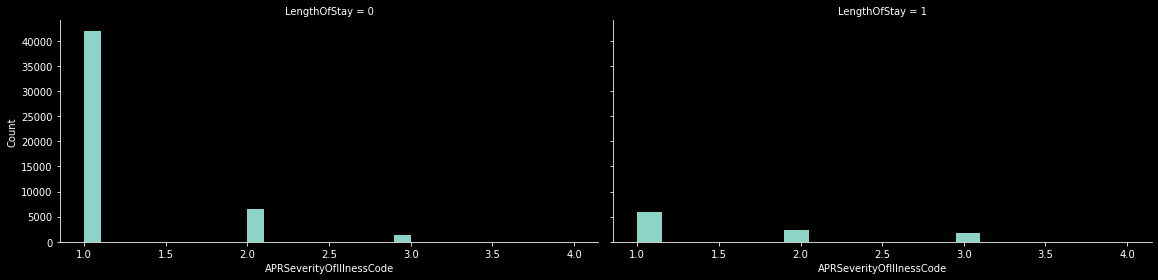

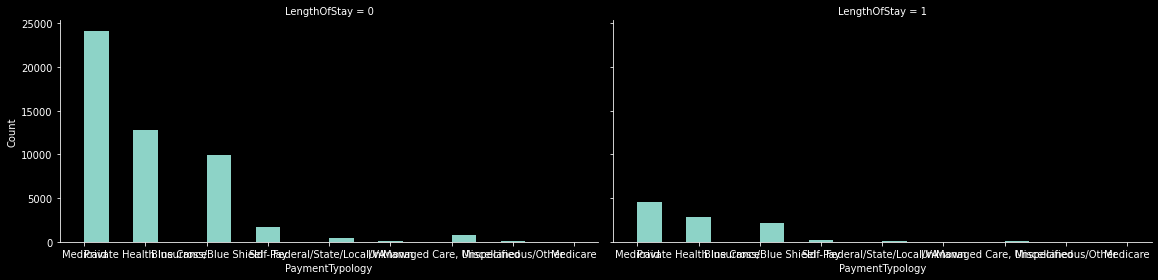

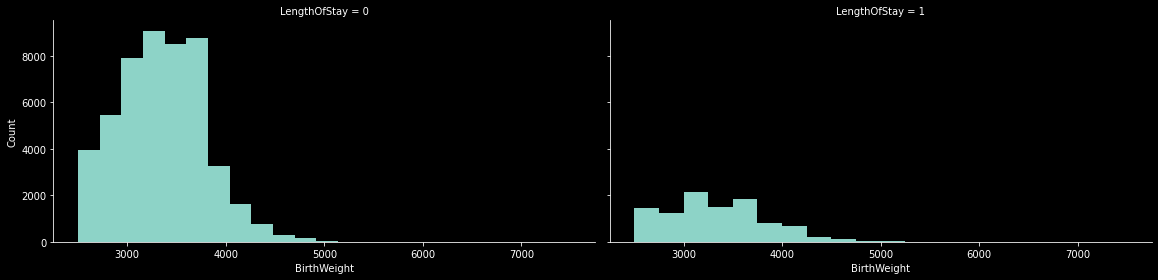

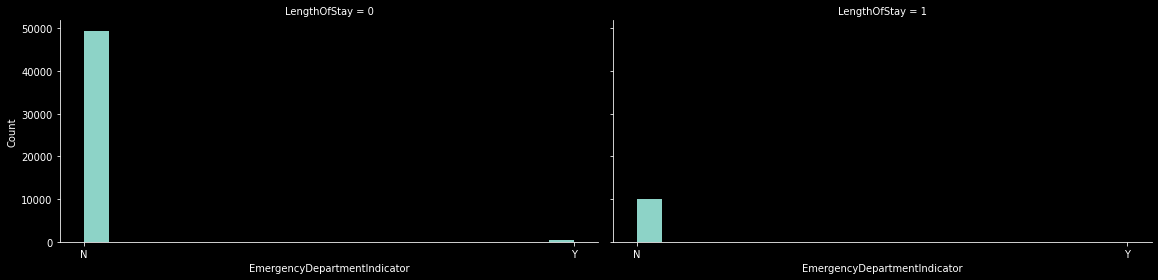

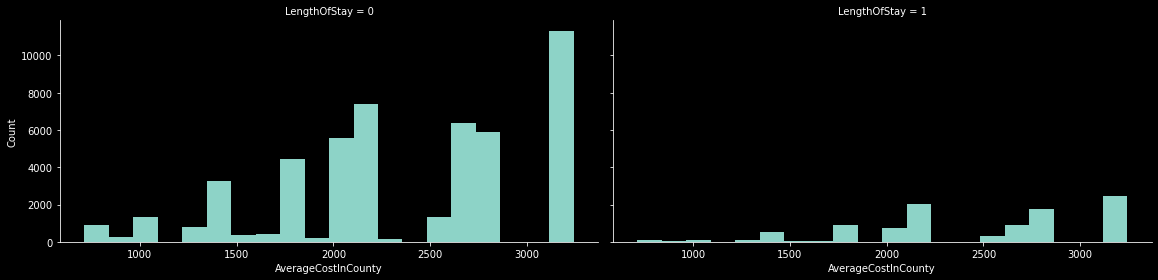

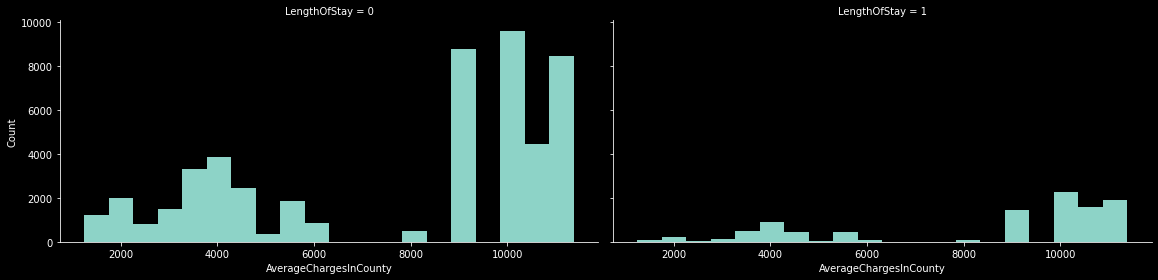

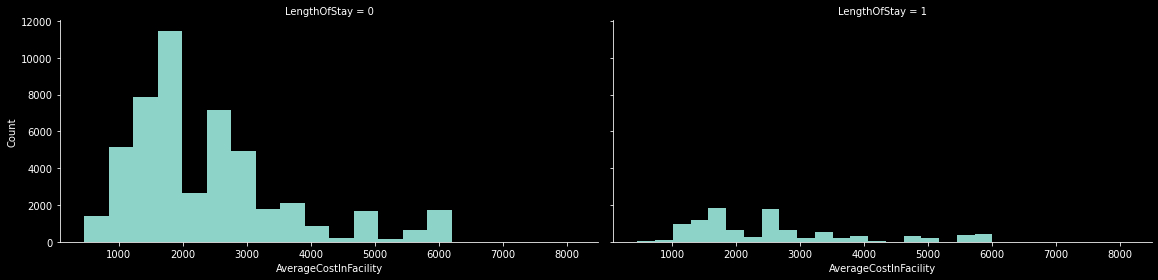

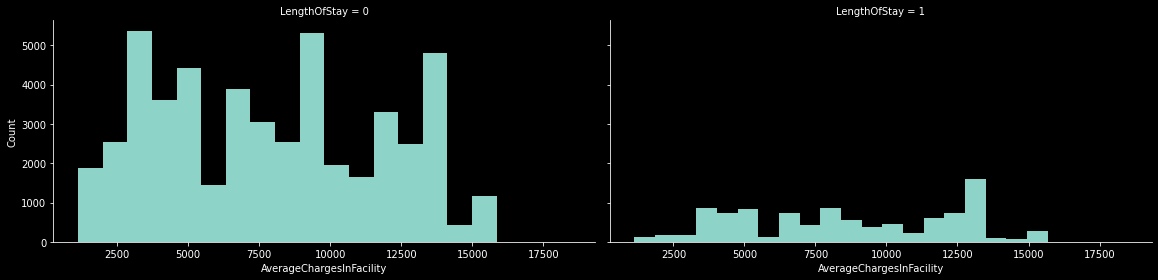

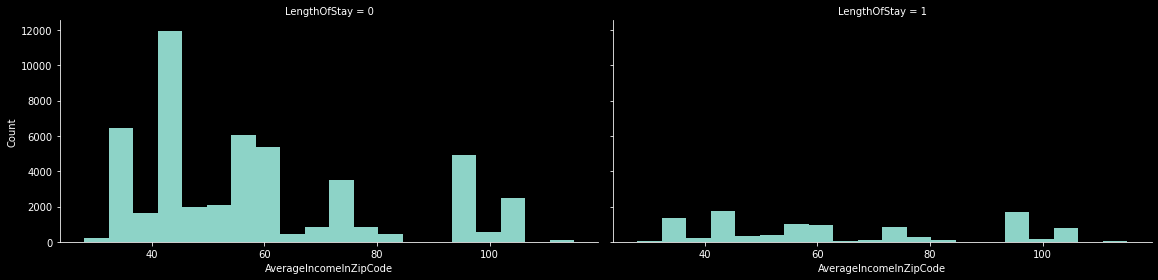

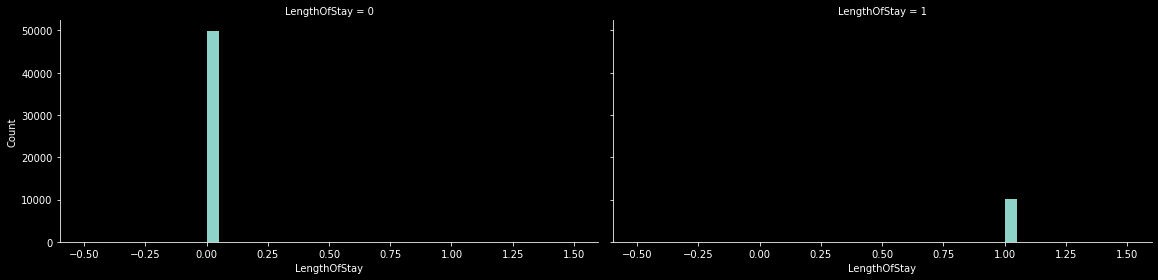

In [14]:
Facet_Grid_sns(train_df)